### Clustering Model

#### Importing libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
import seaborn as sns


#### Loading data

In [2]:
application_rec = pd.read_csv('Data_For_Clustering.csv')
application_rec.sample(5)

,Unnamed: 0,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,AGE,employment_status,y
86949,86949,0,0,1,225000.0,Working,Higher education,Married,House / apartment,1,0,1,1,Managers,31,1,1-3
59837,59837,1,0,1,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,30,1,0
17252,17252,1,0,0,247500.0,Working,Secondary / secondary special,Married,Office apartment,1,1,1,0,Laborers,38,1,1-3
130270,130270,0,0,1,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Laborers,28,1,1-3
128295,128295,1,0,1,292500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Waiters/barmen staff,27,1,0


In [3]:
application_rec.reset_index(inplace=True)
application_rec = application_rec.drop(['Unnamed: 0', 'index'], axis=1)

In [4]:
application_rec.sample(5)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,AGE,employment_status,y
194797,0,1,1,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,1,1,0,Core staff,55,1,0
192421,0,0,1,81000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,54,1,0
170329,1,1,0,247500.0,Commercial associate,Higher education,Civil marriage,House / apartment,1,0,0,0,Accountants,24,1,0
189721,0,1,1,81000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Secretaries,57,1,0
112048,0,0,1,103500.0,Working,Secondary / secondary special,Married,House / apartment,1,1,1,0,Accountants,42,1,0


In [5]:
application_rec = application_rec.dropna()

In [6]:
application_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231221 entries, 0 to 231220
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          231221 non-null  int64  
 1   FLAG_OWN_CAR         231221 non-null  int64  
 2   FLAG_OWN_REALTY      231221 non-null  int64  
 3   AMT_INCOME_TOTAL     231221 non-null  float64
 4   NAME_INCOME_TYPE     231221 non-null  object 
 5   NAME_EDUCATION_TYPE  231221 non-null  object 
 6   NAME_FAMILY_STATUS   231221 non-null  object 
 7   NAME_HOUSING_TYPE    231221 non-null  object 
 8   FLAG_MOBIL           231221 non-null  int64  
 9   FLAG_WORK_PHONE      231221 non-null  int64  
 10  FLAG_PHONE           231221 non-null  int64  
 11  FLAG_EMAIL           231221 non-null  int64  
 12  OCCUPATION_TYPE      231221 non-null  object 
 13  AGE                  231221 non-null  int64  
 14  employment_status    231221 non-null  int64  
 15  y                

In [7]:
from sklearn.preprocessing import StandardScaler

# One-hot encode the categorical columns
income_types = pd.get_dummies(application_rec['NAME_INCOME_TYPE'], prefix='income')
edu_types = pd.get_dummies(application_rec['NAME_EDUCATION_TYPE'], prefix='education')
family_statuses = pd.get_dummies(application_rec['NAME_FAMILY_STATUS'], prefix='family')
housing_types = pd.get_dummies(application_rec['NAME_HOUSING_TYPE'], prefix='housing')
occupation_types = pd.get_dummies(application_rec['OCCUPATION_TYPE'], prefix='occupation')

# Concatenate the one-hot encoded columns with the binary columns and numeric columns
X = pd.concat([application_rec[['AMT_INCOME_TOTAL', 'AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                     'employment_status', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']],
               income_types, edu_types, family_statuses, housing_types, occupation_types], axis=1)

X.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace=True)


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
k = 5

# Create the KMeans model
kmeans_model = KMeans(n_clusters=k)

# Fit the model to the scaled data
kmeans_model.fit(X_scaled)

# Get the cluster assignments for each data point
labels = kmeans_model.labels_

# Add the cluster assignments to the original DataFrame
application_rec['cluster'] = labels

# Print the cluster centers
print(kmeans_model.cluster_centers_)
application_rec['cluster'] 

C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 4.58297223e-02  1.12338219e-01  0.00000000e+00 -2.06525583e-01
  -8.49906704e-02 -3.97489672e-02 -6.20561033e-01 -2.16172124e-02
   3.03482077e+00  6.53322991e-02 -1.28717793e+00  4.61568819e-02
   3.29176955e-01 -2.96359266e-02 -4.37401152e-02 -2.97923340e-01
  -6.18339754e-02  8.27986595e-02 -5.16232248e-03 -7.41106235e-02
   3.93566437e-02  7.91641697e-03  4.80605920e-02  9.51327130e-02
   2.05738029e-01 -2.56832197e-02 -2.26306846e-01 -3.25858890e-02
  -5.22415727e-02 -1.50137912e-02  8.05453413e-01 -1.05023420e-01
   3.02364277e-02 -2.49009963e-01  8.01967741e-03 -3.55873119e-01
  -7.18047204e-02  5.23686705e-02  5.19857492e-01 -9.05711213e-02
  -4.44213152e-02 -3.68654325e-01  1.00214842e-01 -3.70592964e-02
  -3.69241831e-02]
 [ 2.67991032e-01  3.42655476e-02  0.00000000e+00  4.43889181e-03
   4.82461345e-02  7.98187378e-02  1.60624693e+00  5.64053451e-02
  -3.29345660e-01 -6.23901557e-03 -1.28585063e+00 -4.91328306e-03
   1.27475518e-01  1.64058500e-02 -1.12513723e-02 -1.2647

0         3
1         1
2         1
3         1
4         1
         ..
231216    0
231217    3
231218    3
231219    2
231220    3
Name: cluster, Length: 231221, dtype: int32

In [8]:
application_rec.sample(20)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,AGE,employment_status,y,cluster
102167,0,0,1,225000.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,0,1,High skill tech staff,38,1,0,4
179809,0,0,1,360000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,1,Laborers,29,1,0,3
137554,0,0,1,198000.0,Commercial associate,Secondary / secondary special,Separated,House / apartment,1,0,1,0,Core staff,43,1,0,1
126037,1,1,0,193500.0,State servant,Incomplete higher,Married,House / apartment,1,1,1,0,Core staff,35,1,0,0
210603,0,0,0,157500.0,Working,Secondary / secondary special,Single / not married,With parents,1,0,0,0,Laborers,39,1,0,2
133157,0,0,1,112500.0,Working,Secondary / secondary special,Separated,House / apartment,1,1,1,0,Sales staff,52,1,0,3
199784,0,0,0,121500.0,Working,Secondary / secondary special,Civil marriage,Office apartment,1,0,0,0,Core staff,65,1,0,3
230917,1,1,1,427500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,0,0,0,Managers,54,1,0,3
143695,1,0,1,144000.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,1,0,1,0,Laborers,27,1,0,1
182429,1,1,1,112500.0,Working,Secondary / secondary special,Single / not married,With parents,1,0,0,0,Laborers,35,1,0,2


In [9]:
application_rec.to_csv("aa.csv")

C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\clust

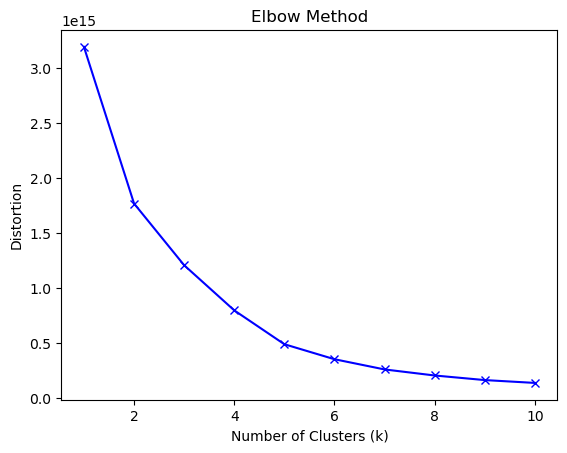

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1, 11)  # Test for different values of k (e.g., 1 to 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

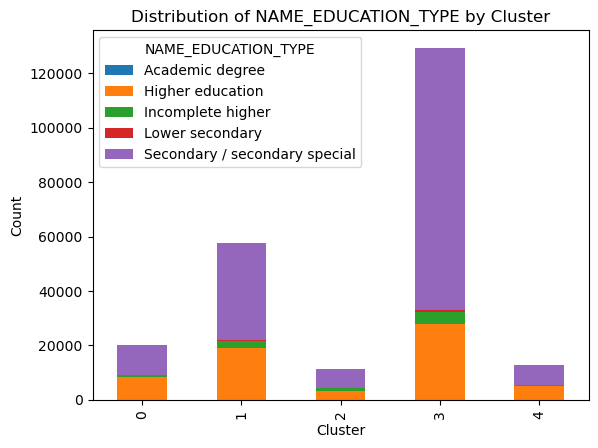

In [11]:
grouped_data = application_rec.groupby(['cluster', 'NAME_EDUCATION_TYPE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of NAME_EDUCATION_TYPE by Cluster')

plt.show()

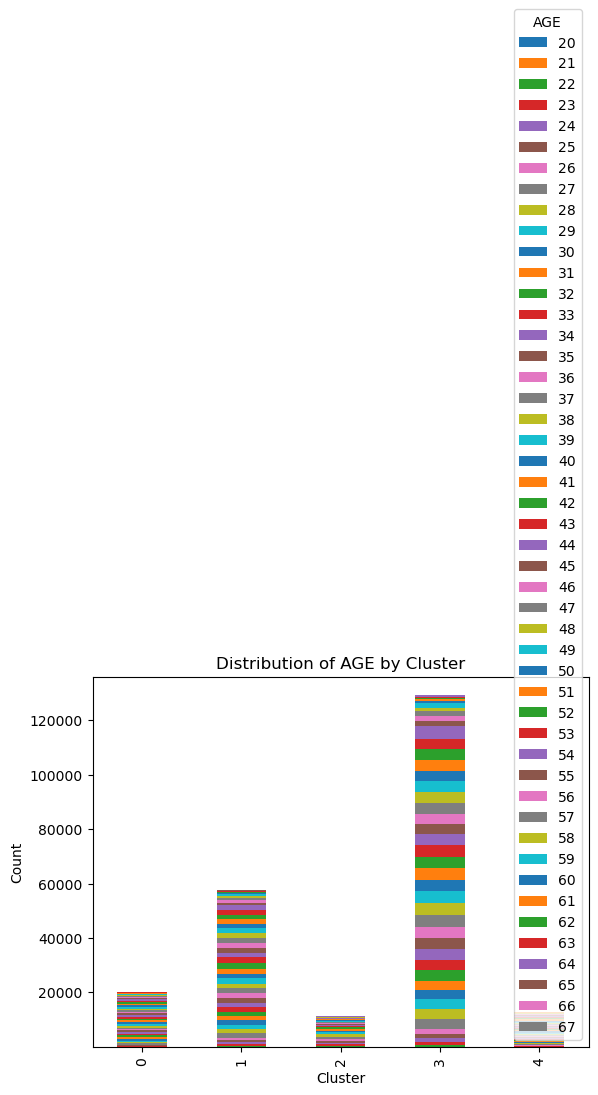

In [12]:
grouped_data = application_rec.groupby(['cluster', 'AGE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of AGE by Cluster')

plt.show()

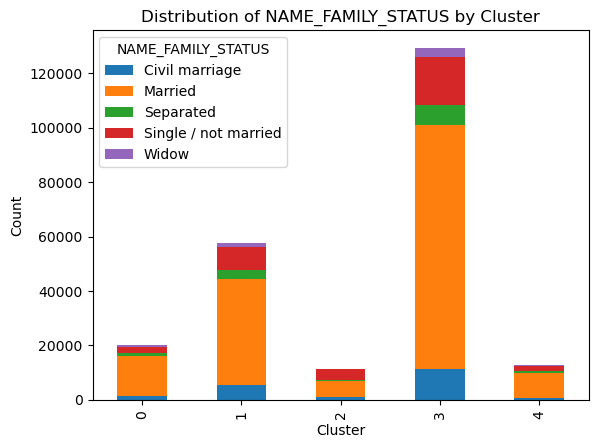

In [13]:
grouped_data = application_rec.groupby(['cluster', 'NAME_FAMILY_STATUS']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of NAME_FAMILY_STATUS by Cluster')

plt.show()

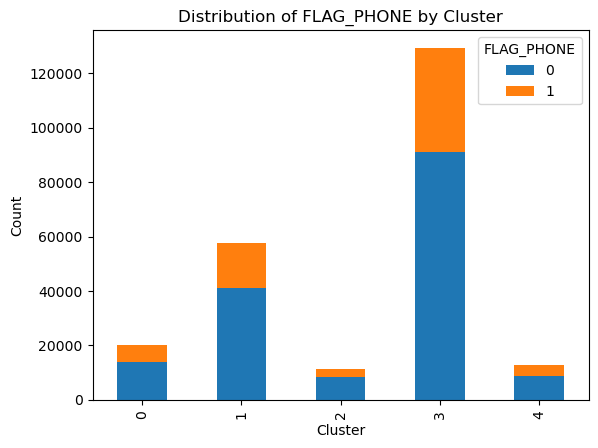

In [14]:
grouped_data = application_rec.groupby(['cluster', 'FLAG_PHONE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of FLAG_PHONE by Cluster')

plt.show()

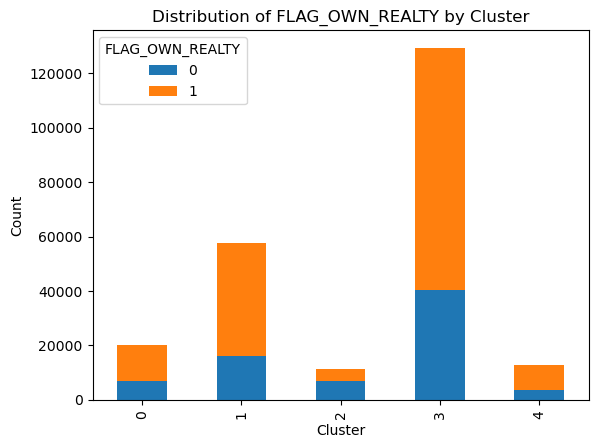

In [15]:
grouped_data = application_rec.groupby(['cluster', 'FLAG_OWN_REALTY']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of FLAG_OWN_REALTY by Cluster')

plt.show()

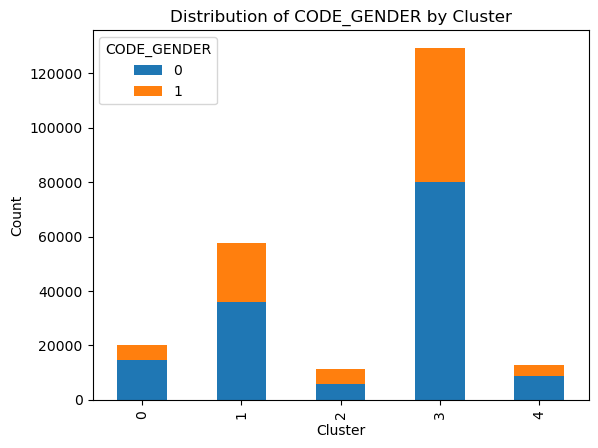

In [16]:

grouped_data = application_rec.groupby(['cluster', 'CODE_GENDER']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of CODE_GENDER by Cluster')

plt.show()

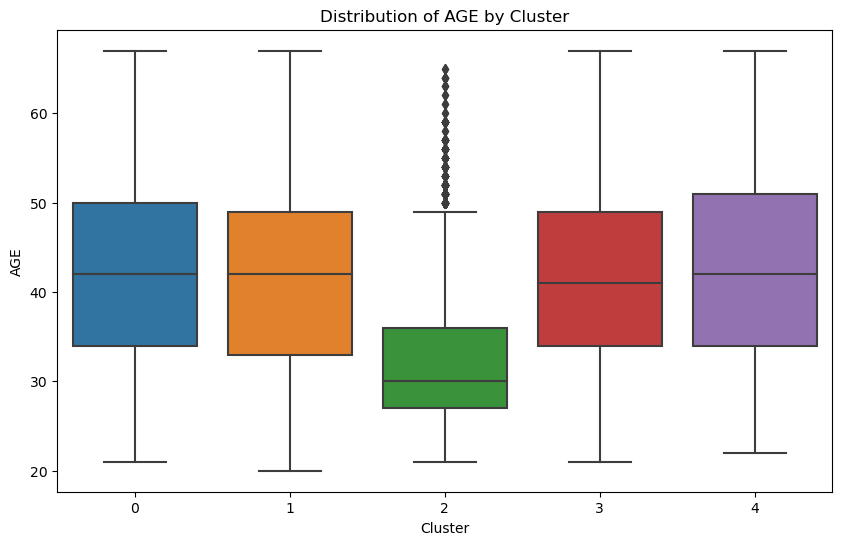

In [17]:


# Create a box plot to visualize the distribution of speed limits for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='AGE', data=application_rec)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('AGE')
plt.title('Distribution of AGE by Cluster')

# Show the plot
plt.show()

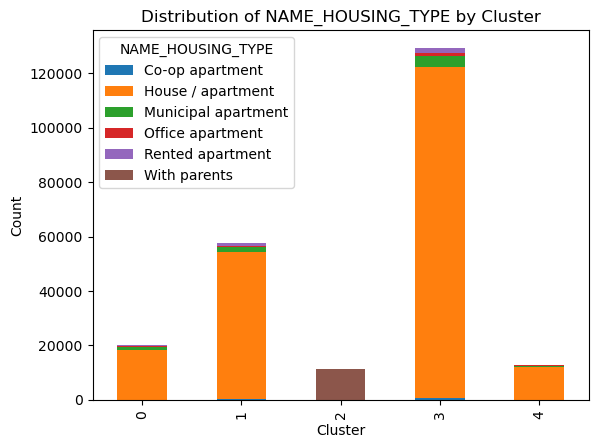

In [18]:


grouped_data = application_rec.groupby(['cluster', 'NAME_HOUSING_TYPE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of NAME_HOUSING_TYPE by Cluster')

plt.show()

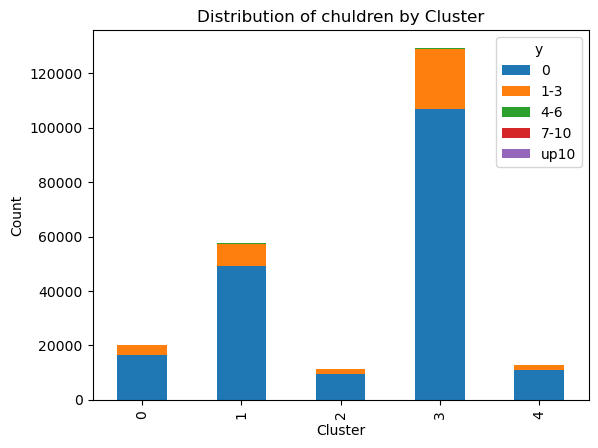

In [19]:

grouped_data = application_rec.groupby(['cluster', 'y']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of chuldren by Cluster')

plt.show()



In [ ]:
# Filter the data to include only years above 1990
filtered_data = application_rec['AMT_INCOME_TOTAL']

# Group the filtered data by 'Vehicle Year' and 'Cluster' and calculate the counts
grouped_data = filtered_data
#.groupby(['Vehicle Year', 'Cluster']).size().unstack()
# Get the unique clusters
clusters = application_rec['cluster'].unique()

# Set the x-axis as the 'Vehicle Year'
x = grouped_data.index

# Set the width of each bar
bar_width = 0.8 / len(clusters)

# Plot the bars for each cluster
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    plt.bar(x + i * bar_width, grouped_data[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Vehicle Year')
plt.ylabel('Quantity')
plt.title('Quantity of Vehicles by Year and Cluster')
plt.legend()

# Show the plot
plt.show()


# Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Define the data


# Define the number of clusters
n_clusters = 5

# Create an AgglomerativeClustering instance
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AgglomerativeClustering model to the data
agglomerative.fit(X_scaled)

# Retrieve the cluster labels
labels = agglomerative.labels_

# Print the labels
print(labels)


# DBSCAN 
####  The label -1 represents noise/outliers.


Note: DBSCAN does not require you to specify the number of clusters in advance, as it discovers clusters based on density.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define the data


# Define the parameters for DBSCAN
eps = 10# Maximum distance between two samples to be considered as neighbors
min_samples = 100  # Minimum number of samples in a neighborhood to be considered a core point

# Create a DBSCAN instance
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to the data
dbscan.fit(X_scaled)

# Retrieve the cluster labels
labels = dbscan.labels_

# Print the labels
print(labels)
